In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read_file = pd.read_csv(r'heart_disease_conditions_20220317.txt', header=0, delim_whitespace=True)
# read_file.to_csv (r'heart_disease_conditions_20220317(csvV1).csv', index=None)

## 100K Train/Test

In [3]:
### vvvvvvvvvvvvvvvvvvvvvvvvvvvvv global vars vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv

RANDOM_STATE = 42

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ end global vars ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


# control flow of output:
# def go():
#         import sys
#         x = input('to continue enter 3: ')
#         if(x == "3"):
#             pass
#         else:
#             print('\n************* Process terminated by user **********\n')
#             sys.exit(0)


def menu(choices, prompts):
    
    # display menu by displaying the list of prompts and list of choices:
    print()
    for p in range(len(prompts)):
        print()
        print(prompts[p], ": ", choices[p]) 
    print()
    
    # validate user selection:
    while(True):
        choice = input('Enter your selection from the options above: ')
        # if the user's input is in the choices list, return that choice because it is valid:
        if choice in choices:
            return choice
        else:
            print('Please enter your selection from the options above: ')


def preProcess(file):
       
    df = pd.read_csv(file, header=0)
    df["LR"] = ""
    df["age_group_float"] = df["age_group"].replace({"-65":0, "65-74":1, "75-84":2, "85+":3})
    print()
    display = input('To display dataset parameters, enter 3 otherwise just press enter: ')
    if(display=='3'):
    
        print('df.head(): \n', df.head(), '\n')
        
        # use describe and info to get a better idea what the data looks like:
        print('df.info(): ')    
        print(df.info(), '\n'  ) 
            
        print('df.describe(): ')    
        print(df.describe(), '\n'  )  
        
        #find dimensions of the data:           
        print(" data set dimensions:{}". format(df.shape))
        
        #go()
     
    #find missing or null data
    
    if(df.isnull().sum().sum()>0):
        df.dropna()
        print('found and corrected null data: ')
        
    if(df.isna().sum().sum()>0):
        df.dropna()  
        print('found and corrected missing data: ')
    
    if(display=='3'):
        print('df.isnull().sum()')
        print(df.isnull().sum(), '\n')

        print('df.isna().sum()')
        print(df.isna().sum())
        
    print('\ncompletion of search for missing/null data: \n\n')
    
#     X = df.iloc[1:, [12,14,16,22,23,24,25,26,27,28,29]].values

#     y = df.iloc[1:, 21].values
    
 #df.loc[1,["A", "C"]]
    X = df.loc[1:,["gender_source_value","race_source_value","ethnicity_source_value", "i_diabetes", "i_chronic","i_high_bp","i_obesity","i_statin","i_aspirin", "age_group_float"]].values

    y = df.loc[1:, "dep_target_hd"].values

    if(display=='3'):
        print('df X:')
        print(X, '\n')
            
        print('df Y:')    
        
        print(y, '\n')
        
        #go()
    
    from sklearn import preprocessing
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder
    labelencoder_Y = LabelEncoder()
    y = labelencoder_Y.fit_transform(y)
    
    if(display=='3'):
        print('Y transformed into 0s and 1s:')
        print(y, '\n') 
    
    if(display=='3'):
        print('X: ')
        print(X, '\n')
        print('X_tshape: ', X.shape, '\n') 
   
    return X, y


# Logistic Regression Algorithm:
def LR(X_train, y_train, X_test, y_test, choices, choice, results):
    # Logistic Regression Algorithm
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(solver = 'lbfgs', random_state = RANDOM_STATE)
    #classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
#     sub = pd.DataFrame(data=X_test)
#     sub["pred"] = y_pred
#     print("sub \n",sub)
#     sub.head()
#     print("y_pred", y_pred)

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)

    #cm[0,0] is the true positives
    #cm[1,1] is the true negatives
    #cm[0,1] are the false positives
    #cm[1,0] are the false negatives

    print('\nResults for Logistic Regression: \n')
    print('cm: ')
    print(cm, '\n')
    
#     file = r'heart_disease_conditions_100.csv'
#     df = pd.read_csv(file, header=0)
#     df["LR"] = ""
#     for i in range(len(y_pred)):
#         df["LR"][i] = y_pred[i]
# #         print("X_test[i]:", X_test[i])
#         print("person_id:", df["person_id"][i])
#         print("X_test=%s, Predicted=%s" % (X_test[i], y_pred[i]))
    
#     df.to_csv (r'heart_disease_conditions_100(test).csv', index=None)
    
    #print('y_test.shape[0]: ',y_test.shape[0] )
    
    score = classifier.score(X_test, y_test)
    print('score: ', score, '\n')
    
    
    acc = (cm[0,0] + cm[1,1])/y_test.shape[0] # the total of the test cases, not the train cases
    print('acc: ', acc, '\n')
    lr_acc = acc
   
    results[choices[choice]] = acc 
    choice += 1
    print('results: ', results, '\n')
    
#     go()
    print('\n')
    
    return choice, results;

# KNeighborsClassifier
def KNN(X_train, y_train, X_test, y_test, choices, choice, results):
   
    from sklearn.neighbors import KNeighborsClassifier

    nearest = 2
    classifier = KNeighborsClassifier(n_neighbors=nearest, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    print('This is the KNN: ')
    y_pred = classifier.predict(X_test)

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
 
    print('\nResults for KNN: \n')
    print('cm: ')
    print(cm, '\n')
    
    acc = (cm[0,0] + cm[1,1])/y_test.shape[0] # the total of the test cases, not the train cases
    knn_acc = acc # probly don't need this now as results stored in dict
    print('acc: ', acc, '\n')
#     go()
    print('\n')

    results[choices[choice]] = acc 
    choice += 1
    print('results: ', results, '\n')
    
#     go()
    print('\n')
    
    return choice, results;

# SVM using SVC:
def SVC(X_train, y_train, X_test, y_test, choices, choice, results):
  
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'linear', random_state=RANDOM_STATE)
    classifier.fit(X_train, y_train)
    print('This is the SVM')
#     go()
    print('\n')
    y_pred = classifier.predict(X_test)

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)

    print('\nResults for SVC: \n')
    print('cm: ')
    print(cm, '\n')
    
    acc = (cm[0,0] + cm[1,1])/y_test.shape[0] # the total of the test cases, not the train cases
    svc_acc = acc 
    print('acc: ', acc, '\n')

    results[choices[choice]] = acc 
    choice += 1
    print('results: ', results, '\n')
    
#     go()
    print('\n')

    return choice, results;


#Gaussian Naive Bayes
def GNB(X_train, y_train, X_test, y_test, choices, choice, results):
  
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    print('This is the GaussianNB')
#     go()
    print('\n')
    y_pred = classifier.predict(X_test)

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)

    print('\nResults for GNB: \n')
    print('cm: ')
    print(cm, '\n')
    
    acc = (cm[0,0] + cm[1,1])/y_test.shape[0] # the total of the test cases, not the train cases
    GNB_acc = acc
    print('acc: ', acc, '\n')
    
    results[choices[choice]] = acc 
    choice += 1
    print('results: ', results, '\n')
    
#     go()
    print('\n')
    
    return choice, results;


#Decision Tree Classifier:
def DTC(X_train, y_train, X_test, y_test, choices, choice, results):
    
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = RANDOM_STATE)
    classifier.fit(X_train, y_train)
    print('This is the decision tree classifier')
#     go()
    print('\n')
    y_pred = classifier.predict(X_test)

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)

    print('\nResults for DTC: \n')
    print('cm: ')
    print(cm, '\n')
    
    acc = (cm[0,0] + cm[1,1])/y_test.shape[0] # the total of the test cases, not the train cases
    dtc_acc = acc
    print('acc: ', acc, '\n')
    
    results[choices[choice]] = acc  
    choice += 1
    print('results: ', results, '\n') 
    
#     go()
    print('\n');
    
    return choice, results;

#Random Forest Classifier:
def RF(X_train, y_train, X_test, y_test, choices, choice, results):         
   
    from sklearn.ensemble import RandomForestClassifier
    
    classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=RANDOM_STATE)
    classifier.fit(X_train, y_train)
    print('This is the Random Forest Classifier')
#     go()
    print('\n')
    y_pred = classifier.predict(X_test)

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)

    print('\nResults for RF: \n')
    print('cm: ')
    print(cm, '\n')
    
    acc = (cm[0,0] + cm[1,1])/y_test.shape[0] # the total of the test cases, not the train cases
    rf_acc = acc
    print(rf_acc)
    print('acc: ', acc, '\n')
    
    # new CR code 210705; update the results dictionary with the results of this run:
    results[choices[choice]] = acc  
    choice += 1
    print('results: ', results, '\n')

    return choice, results;

In [6]:
def main():
    print('\n\n Comparing classifiers using heart_disease_conditions_100K_20220407.csv\n\n')
    
    """
    Report testing accuracy for each of the 6 classifiers.
    """
    print('heart_disease_conditions_100K_20220407.csv');
    print('input and pre-process the dataset: \n')
    
    file = r'heart_disease_conditions_100K_20220407.csv'
#     file = r'heart_disease_conditions_20220317(original).csv'
    
    X, y = preProcess(file)
#     X = df.loc[1:,["gender_source_value","race_source_value","ethnicity_source_value", "i_diabetes", "i_chronic","i_high_bp","i_obesity","i_abn_serum_chol","i_statin","i_aspirin"]].values
#     y = df.loc[1:, "dep_target_hd"].values

    
    print('split dataset into train and test segments:\n')
    from sklearn.model_selection import train_test_split
    testSize = 0.200
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize, random_state = RANDOM_STATE)
    
    print("X_train:")
    display(X_train)
    print("X_test:")
    display(X_test)
    print("y_train:")
    display(y_train)
    print("y_test:")
    display(y_test)

    choices = ['LR', 'KNN', 'SVM', 'GNB', 'DTC', 'RF']

    # store choices/results pairs where choices is key, results is value:
    results = {}
    choice = 0
   
    
    choice, results = LR(X_train, y_train, X_test, y_test, choices, choice, results);         
    
    choice, results = KNN(X_train, y_train, X_test, y_test, choices, choice, results);     

    choice, results = SVC(X_train, y_train, X_test, y_test, choices, choice, results);     
            
    choice, results = GNB(X_train, y_train, X_test, y_test, choices, choice, results); 
    
    choice, results = DTC(X_train, y_train, X_test, y_test, choices, choice, results);   
    
    choice, results = RF(X_train, y_train, X_test, y_test, choices, choice, results);   
    
main()



 Comparing classifiers using heart_disease_conditions_100K_20220407.csv


heart_disease_conditions_100K_20220407.csv
input and pre-process the dataset: 


To display dataset parameters, enter 3 otherwise just press enter: 3
df.head(): 
    person_id  gender_concept_id  year_of_birth  month_of_birth  day_of_birth  \
0       1054               8507           1942              11             1   
1       1067               8507           1938               6             1   
2       2017               8532           1926               4             1   
3       2963               8532           1936               6             1   
4       3248               8532           1923              12             1   

   birth_datetime  race_concept_id  ethnicity_concept_id  location_id  \
0             NaN             8527              38003564          609   
1             NaN             8527              38003564          615   
2             NaN             8527              38003564     

Y transformed into 0s and 1s:
[0 1 0 ... 0 0 0] 

X: 
[[1 1 1 ... 1 0 1]
 [2 1 1 ... 0 0 2]
 [2 3 3 ... 0 0 1]
 ...
 [2 1 1 ... 1 1 1]
 [1 2 2 ... 0 0 0]
 [1 1 1 ... 0 0 2]] 

X_tshape:  (99999, 10) 

split dataset into train and test segments:

X_train:


array([[2, 1, 1, ..., 1, 0, 3],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 2],
       [2, 1, 1, ..., 1, 0, 3]])

X_test:


array([[1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [2, 2, 2, ..., 1, 1, 2],
       ...,
       [2, 1, 1, ..., 0, 0, 3],
       [2, 1, 1, ..., 1, 1, 3],
       [2, 1, 1, ..., 0, 0, 2]])

y_train:


array([0, 1, 0, ..., 0, 0, 0])

y_test:


array([1, 1, 0, ..., 1, 1, 1])


Results for Logistic Regression: 

cm: 
[[9763 1751]
 [3490 4996]] 

score:  0.73795 

acc:  0.73795 

results:  {'LR': 0.73795} 



This is the KNN: 

Results for KNN: 

cm: 
[[9908 1606]
 [4868 3618]] 

acc:  0.6763 



results:  {'LR': 0.73795, 'KNN': 0.6763} 



This is the SVM



Results for SVC: 

cm: 
[[8464 3050]
 [2441 6045]] 

acc:  0.72545 

results:  {'LR': 0.73795, 'KNN': 0.6763, 'SVM': 0.72545} 



This is the GaussianNB



Results for GNB: 

cm: 
[[9169 2345]
 [2876 5610]] 

acc:  0.73895 

results:  {'LR': 0.73795, 'KNN': 0.6763, 'SVM': 0.72545, 'GNB': 0.73895} 



This is the decision tree classifier



Results for DTC: 

cm: 
[[8834 2680]
 [2452 6034]] 

acc:  0.7434 

results:  {'LR': 0.73795, 'KNN': 0.6763, 'SVM': 0.72545, 'GNB': 0.73895, 'DTC': 0.7434} 



This is the Random Forest Classifier



Results for RF: 

cm: 
[[8724 2790]
 [2350 6136]] 

0.743
acc:  0.743 

results:  {'LR': 0.73795, 'KNN': 0.6763, 'SVM': 0.72545, 'GNB': 0.73895, 'DTC': 0.7434, 'RF': 0.743

## Decision Boundaries



 Comparing classifiers using CSE6242-project-Results-dataset.csv




input and pre-process the dataset: 


To display dataset parameters, enter 3 otherwise just press enter: 3
df.head(): 
    person_id  gender_concept_id  year_of_birth  month_of_birth  day_of_birth  \
0       1054               8507           1942              11             1   
1       1067               8507           1938               6             1   
2       2017               8532           1926               4             1   
3       2963               8532           1936               6             1   
4       3248               8532           1923              12             1   

   birth_datetime  race_concept_id  ethnicity_concept_id  location_id  \
0             NaN             8527              38003564          609   
1             NaN             8527              38003564          615   
2             NaN             8527              38003564          936   
3             NaN                0  

X.shape: (99999, 10)
X_std: (99999, 10)
decomp_X.shape: (99999, 2)
X_train_PCA2.shape (79999, 2)
X_test_PCA2.shape (20000, 2)

Results for Logistic Regression: 

cm: 
[[9376 2162]
 [3194 5268]] 

score:  0.7322 

acc:  0.7322 

results:  {'LR': 0.7322} 



This is the KNN: 

Results for KNN: 

cm: 
[[10008  1530]
 [ 5101  3361]] 

acc:  0.66845 



results:  {'LR': 0.7322, 'KNN': 0.66845} 



This is the GaussianNB



Results for GNB: 

cm: 
[[9617 1921]
 [3535 4927]] 

acc:  0.7272 

results:  {'LR': 0.7322, 'KNN': 0.66845, 'GNB': 0.7272} 



This is the decision tree classifier



Results for DTC: 

cm: 
[[8583 2955]
 [2278 6184]] 

acc:  0.73835 

results:  {'LR': 0.7322, 'KNN': 0.66845, 'GNB': 0.7272, 'DTC': 0.73835} 



This is the Random Forest Classifier



Results for RF: 

cm: 
[[8582 2956]
 [2271 6191]] 

0.73865
acc:  0.73865 

results:  {'LR': 0.7322, 'KNN': 0.66845, 'GNB': 0.7272, 'DTC': 0.73835, 'RF': 0.73865} 



Process terminated without exception.




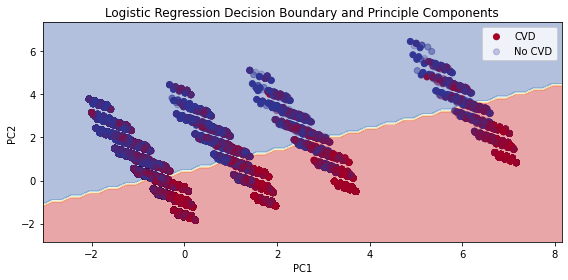

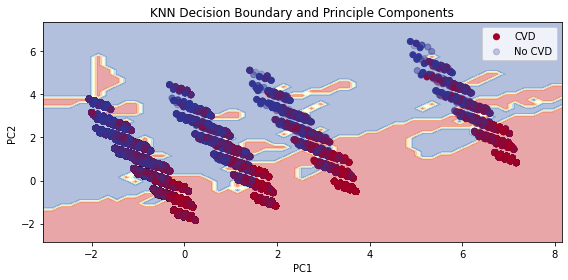

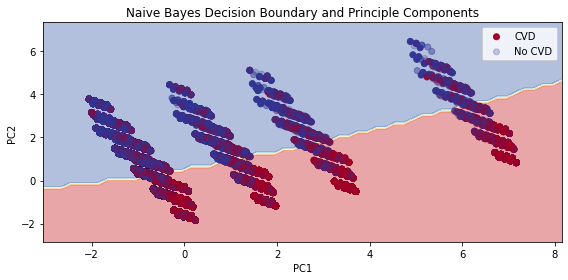

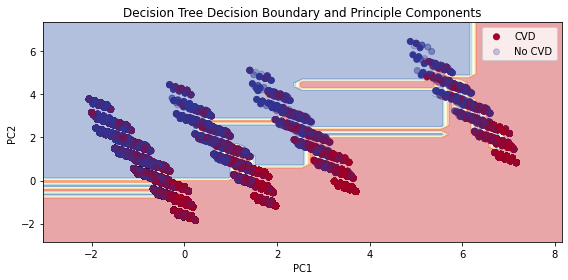

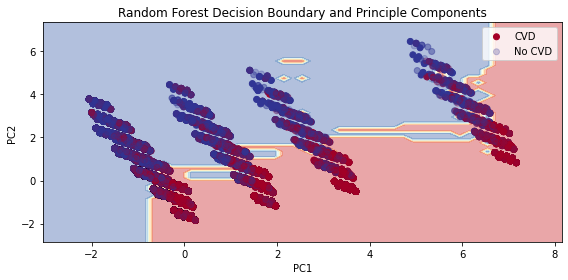

In [21]:
def main2():
    print('\n\n Comparing classifiers using CSE6242-project-Results-dataset.csv\n\n')
    
    """
    Report testing accuracy for each of the 6 classifiers.
    """
    print('\n');
    print('input and pre-process the dataset: \n')
    
    file = r'heart_disease_conditions_100K_20220407.csv'
    
    X, y = preProcess(file)
#     X = X.loc[1:,["gender_source_value","race_source_value","ethnicity_source_value", "i_diabetes", "i_chronic","i_high_bp","i_obesity","i_abn_serum_chol","i_statin","i_aspirin"]].values
#     y = y.loc[1:, "dep_target_hd"].values

    
    print('split dataset into train and test segments:\n')
    from sklearn.model_selection import train_test_split
    
    # function names act as keys in results dictionary:
    choices = ['LR', 'KNN', 'GNB', 'DTC', 'RF']

    # store choices/results pairs where choices is key, results is value:
    results = {}
    choice = 0
   
    """
                 perform PCA to project the data into two-dimensional space. 
                 Build the classifiers (Logistic Regression, KNN, SVC, Naive Bayes, Decision Tree, Random Forest) 
                 using the two-dimensional PCA results. 
                 Plot the data points and decision boundary of each classifier in the two-dimensional space.
    """
    print('\n\n');
    
    from sklearn.decomposition import PCA
    
    #PCA
    nComps = 2
    pca = PCA(n_components=nComps, random_state=RANDOM_STATE)
    
    #Scale and Normalize
    from sklearn.preprocessing import StandardScaler
    X_std = StandardScaler().fit_transform(X)
    
    #Fit
    pca.fit(X_std)
    
    #Transform
    decomp_X=pca.transform(X_std)
    print("X.shape:", X.shape)
    print("X_std:", X_std.shape)
    print("decomp_X.shape:", decomp_X.shape)
    
    #Split to train and test
    X_train_PCA2, X_test_PCA2, y_train, y_test = train_test_split(decomp_X, y, test_size=0.2, random_state=30)
    print("X_train_PCA2.shape", X_train_PCA2.shape)
    print("X_test_PCA2.shape", X_test_PCA2.shape)
    
    #go()
    from sklearn.naive_bayes import GaussianNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
#     from sklearn.svm import SVC
    import numpy as np
    
    choice, results = LR(X_train_PCA2, y_train, X_test_PCA2, y_test, choices, choice, results);         
    choice, results = KNN(X_train_PCA2, y_train, X_test_PCA2, y_test, choices, choice, results);     
#     choice, results = SVC(X_train_PCA2, y_train, X_test_PCA2, y_test, choices, choice, results);        
    choice, results = GNB(X_train_PCA2, y_train, X_test_PCA2, y_test, choices, choice, results); 
    choice, results = DTC(X_train_PCA2, y_train, X_test_PCA2, y_test, choices, choice, results);   
    choice, results = RF(X_train_PCA2, y_train, X_test_PCA2, y_test, choices, choice, results);  
    
    #Logistic Regression
    class_lr = LogisticRegression(random_state=0).fit(X_train_PCA2, y_train)
    
    #KNN
    classifier = KNeighborsClassifier(n_neighbors=3)
    class_knn = classifier.fit(X_train_PCA2, y_train)
    
    #SVM
#     classifier = SVC(kernel = 'linear', random_state=RANDOM_STATE)
#     class_SVM = classifier.fit(X_train_PCA2, y_train)
     
    #Naive Bayes
    gnb = GaussianNB()
    class_gnb = gnb.fit(X_train_PCA2, y_train)
    
    #Decision Tree
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = RANDOM_STATE)
    class_DT = classifier.fit(X_train_PCA2, y_train)
    
    #Random Forest
    classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=RANDOM_STATE)
    class_RF=classifier.fit(X_train_PCA2, y_train)

    def make_meshgrid(x,y,h=0.2):
        x_min, x_max = x.min()-1, x.max()+1
        y_min, y_max = y.min()-1, y.max()+1
        xx,yy = np.meshgrid(np.arange(x_min, x_max,h), np.arange(y_min,y_max,h))
        return xx,yy
    
    def plot_contours(ax, classif, xx, yy, **params):
        Z = classif.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx,yy,Z,**params)
        return out

    def plot_PC(classif,title):
        plt.rcParams["figure.figsize"] = [8,4]
        plt.rcParams["figure.autolayout"]= True
        fig,ax = plt.subplots()
        X0,X1 = decomp_X[:,0], decomp_X[:,1]
        xx,yy = make_meshgrid(X0,X1)
        plot_contours(ax,classif,xx,yy,cmap=plt.cm.RdYlBu,alpha=0.4)
        CVD = ax.scatter(X_test_PCA2[:,0], X_test_PCA2[:,1], c=y_test, cmap="RdYlBu", alpha=1, edgecolors=None)
        CVD_train = ax.scatter(X_train_PCA2[:,0], X_train_PCA2[:,1], c=y_train, cmap="RdYlBu",alpha=0.25, edgecolors= None)
        
        
        ax.set_ylabel("PC2")
        ax.set_xlabel("PC1")
        ax.set_title(f"{title} Decision Boundary and Principle Components")
        ax.legend([CVD, CVD_train],['CVD', 'No CVD'])
       
    plot_PC(class_lr, "Logistic Regression")
    plot_PC(class_knn, "KNN")
#     plot_PC(class_SVM, "SVM")
    plot_PC(class_gnb, "Naive Bayes")
    plot_PC(class_DT, "Decision Tree")
    plot_PC(class_RF, "Random Forest")
    
    print('\n\nProcess terminated without exception.\n\n')
    

main2()


## The decision boundaries and principle components for each model are shown above. The red datapoints those that are diagnosed with CVD, while the blue datapoints are those that are not diagnosed with CVD. The transparent datapoints are from the training set, while the solid color datapoints are from the test set. The red side is the model's "CVD" side, while the blue side is the model's "no CVD" side, with the yellow line as the decision boundary. 

## Logistic Regression has a linear decision boundary
## KNN has a nonparapetric/non-linear decision boundary. 
## Naive Bayes has a parametric decision boundary
## Decision tree is  the most sensitive, showing only extreme classification probabilities that are heavily influenced by single points. 
## The random forest shows lower sensitivity, with isolated points having moderate classification probabilities. 


### Next step: maybe further look into confusion matrix, precision, recall, and F-1 score for each of the classifiers? Get SVM to work